In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2 as pg
import seaborn as sns 
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime as datetime
from time import strptime
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

In [2]:
username = "postgres"
password = "ruchi204"


connection = pg.connect(dbname = "postgres",
                                      user = username,
                                      password = password,
                                      host = "127.0.0.1",
                                      port = "5432")

In [3]:
cursor = connection.cursor()

print ( connection.get_dsn_parameters(),"\n")

cursor.execute("SELECT version();")
record = cursor.fetchone()
print("You are connected to - ", record,"\n")

{'user': 'postgres', 'dbname': 'postgres', 'host': '127.0.0.1', 'port': '5432', 'tty': '', 'options': '', 'sslmode': 'prefer', 'sslcompression': '0', 'krbsrvname': 'postgres', 'target_session_attrs': 'any'} 

You are connected to -  ('PostgreSQL 10.9, compiled by Visual C++ build 1800, 64-bit',) 



In [4]:
pathname = "C:/Users/venka/Documents/Bujjy/Georgetown Data Science/Capstone Data"
#combine all files in the list
all_filenames = [f"{pathname}/Weather Data 2017.csv", f"{pathname}/Weather Data 2018.csv"]

combined_wthr = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_wthr.to_csv(f"{pathname}/combined_wthr.csv", index=False, encoding='utf-8-sig')

In [5]:
combined_wthr.tail()

,STATECODE,ZIPCODE,EVENTDATE,EVENTCODE,EVENTDESCRIPTION
2691695,NY,10988.0,12/1/2018,RAIN,Light Rain
2691696,NY,10990.0,12/1/2018,RAIN,Light Rain
2691697,NY,10998.0,12/1/2018,RAIN,Light Rain
2691698,NY,12746.0,12/1/2018,RAIN,Light Rain
2691699,,NaN,NaN,NaN,NaN


In [6]:
#def load_data()C:/Users/venka/Documents/Bujjy/Georgetown Data Science/Capstone Data
injury_data = pd.read_csv("C:/Users/venka/Documents/Bujjy/Georgetown Data Science/Capstone Data/wrangled_injury._withcounties.csv", 
                          sep=',', usecols=["UPA", "EventDate", "State", "NAMELSAD", "Month", "InsideUS", "Event","Source","Primary NA","Part of Bo","Nature", "Amputation", "Hospitaliz"])

parse_dates = ['EVENTDATE']

injury_data.tail(10)

#weather_data = pd.read_csv("C:/Users/venka/Documents/Bujjy/Georgetown Data Science/Capstone Data/combined_csv.csv", sep=',',usecols=["ZIPCODE","EVENTDATE","EVENTCODE"], dtype={'ZIPCODE': float, 'EVENTDATE': str,'EVENTCODE': str}, parse_dates=parse_dates)

#injury_data.head(10)

#weather_data.head(10)

#injury_merge= pd.merge(left=injury_data,right=weather_data,how='left', left_on=['EVENTDATE','Zip'], right_on=['EVENTDATE','ZIPCODE'])

#injury_merge=injury_merge.astype(dtype = {"EVENTDATE":"datetime64"}, inplace="true")
                       




c:\program files\python37\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,UPA,EventDate,State,Primary NA,Hospitaliz,Amputation,Nature,Part of Bo,Event,Source,NAMELSAD,Month,InsideUS
39825,1339236,2018-05-17,FLORIDA,561730,1,1.0,1311,4422,642,483,NaN,5,0
39826,1358531,2018-07-09,TEXAS,213112,1,1.0,1311,4422,640,8621,NaN,7,0
39827,1357235,2018-07-10,ALASKA,445220,0,1.0,1311,4422,6411,3719,NaN,7,0
39828,1374080,2018-08-22,WEST VIRGINIA,237120,1,0.0,194,310,2731,8423,NaN,8,0
39829,1375142,2018-08-24,TEXAS,213112,1,1.0,1311,4429,6252,7125,NaN,8,0
39830,1376166,2018-08-25,TEXAS,928110,1,0.0,111,52,4334,6521,NaN,8,1
39831,1384824,2018-09-19,TEXAS,213112,1,0.0,1510,513,5544,10,NaN,9,0
39832,1388899,2018-10-04,COLORADO,713920,1,0.0,111,899,4314,3489,NaN,10,0
39833,1392712,2018-10-17,FLORIDA,238990,1,0.0,111,899,4332,6540,NaN,10,1
39834,1416176,2018-10-26,WEST VIRGINIA,561311,1,0.0,194,330,620,4120,NaN,10,0


In [7]:
#injury_data['UPA'].is_unique

#injury_data.set_index('UPA', inplace=True)

injury_data = injury_data.fillna('')

#injury_data.rename(columns={'Primary NAICS':'Primary_NAICS','Final Narrative':'Final_Narrative','Part of Body':'Part_Of_Body','Part of Body Title':'Part_Of_Body_Title','Secondary Source':'Secondary_Source','Secondary Source Title':'Secondary_Source_Title'}, inplace=True)

#injury_data.head(10)
#
#for col in injury_data.columns:

    #print("The column name is", col, "and the type is", injury_data[col].dtype, sep="--")
    
#injury_data=injury_data.astype(dtype = {"UPA":"int64"}, inplace=True)
    
injury_data=injury_data.astype(dtype = {"EventDate":"datetime64"}, inplace=True)
        
injury_data=injury_data.astype(dtype = {"State":"str"}, inplace=True)
    
injury_data=injury_data.astype(dtype = {"Primary NA":"str"}, inplace=True)
    
injury_data=injury_data.astype(dtype = {"Hospitaliz":"int64"}, inplace=True)
    
injury_data=injury_data.astype(dtype = {"Amputation":"str"}, inplace=True)
    
injury_data=injury_data.astype(dtype = {"Nature":"int64"}, inplace=True)
    
injury_data=injury_data.astype(dtype = {"Part of Bo":"int64"}, inplace=True)
    
injury_data=injury_data.astype(dtype = {"Event":"int64"}, inplace=True)
    
injury_data=injury_data.astype(dtype = {"Source":"int64"}, inplace=True)
    
injury_data=injury_data.astype(dtype = {"NAMELSAD":"str"}, inplace=True)
injury_data=injury_data.astype(dtype = {"Month":"str"}, inplace=True)
injury_data=injury_data.astype(dtype = {"InsideUS":"int64"}, inplace=True)
    

print(injury_data["InsideUS"].dtype)


injury_data.shape

injury_data.tail()
    

int64


,UPA,EventDate,State,Primary NA,Hospitaliz,Amputation,Nature,Part of Bo,Event,Source,NAMELSAD,Month,InsideUS
39830,1376166,2018-08-25,TEXAS,928110,1,0.0,111,52,4334,6521,,8,1
39831,1384824,2018-09-19,TEXAS,213112,1,0.0,1510,513,5544,10,,9,0
39832,1388899,2018-10-04,COLORADO,713920,1,0.0,111,899,4314,3489,,10,0
39833,1392712,2018-10-17,FLORIDA,238990,1,0.0,111,899,4332,6540,,10,1
39834,1416176,2018-10-26,WEST VIRGINIA,561311,1,0.0,194,330,620,4120,,10,0


(39835, 4)
(39835, 1)


c:\program files\python37\lib\site-packages\sklearn\linear_model\ridge.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


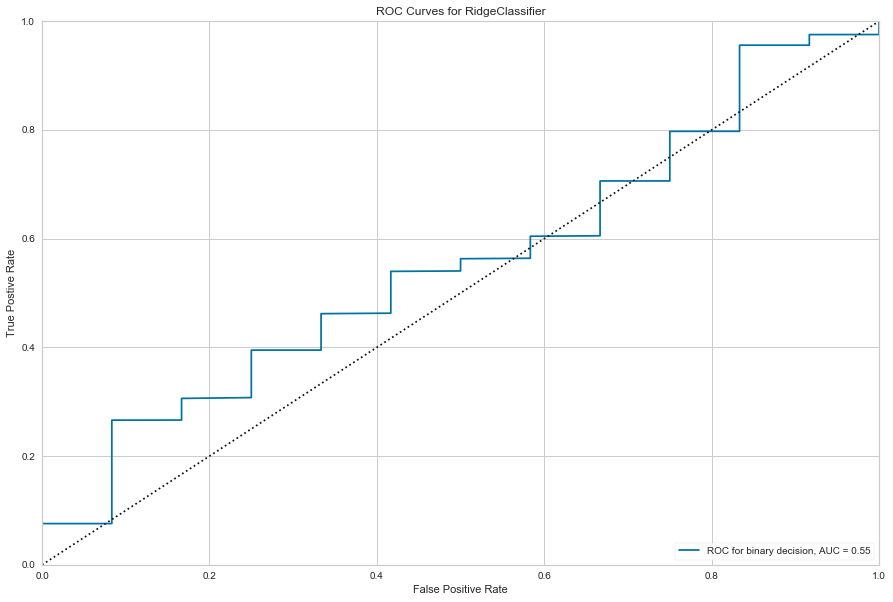

In [16]:
#X = injury_data[["NAMELSAD", "Month", "InsideUS", "Event","Source","Primary NA","Part of Bo","Nature", "Amputation", "Hospitaliz"]].values

injury_data.isnull().values.any()

X = injury_data[["Source","Part of Bo","Nature","Hospitaliz"]].values
#X = X.fillna('')

y = injury_data[["InsideUS"]].values

print(X.shape)

print(y.shape)

#y = y.fillna('')

#X = LabelEncoder().fit_transform(X)
#y = LabelEncoder().fit_transform(y)


#classes = ["0", "1"]
 
from yellowbrick.classifier import ROCAUC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2
)

visualizer = ROCAUC(
    RidgeClassifier(), micro=False, macro=False, per_class=False, size=(1080, 720)
)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data

# Specify the target classes
#classes = ["unoccupied", "occupied"]

# Instantiate the visualizer
#visualizer = RadViz(size=(1080, 720))

#visualizer.fit(X, y)           # Fit the data to the visualizer
#visualizer.transform(X)        # Transform the data
#visualizer.poof()              # Draw/show/poof the data


In [ ]:
print(injury_data["EVENTDATE"].dtype)
months_map = {1: 'Jan',2: 'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',7: 'Jul', 8: 'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
def mapper(month):
    return months_map[month]

mapper(1)

injury_data['month'] = pd.DatetimeIndex(injury_data['EVENTDATE']).month
injury_data['month'] = injury_data['month'].apply(lambda x: mapper(x))
injury_data['month'].unique()
injury_data.head(10)
    

In [ ]:
sns.pairplot(injury_data, x_vars='Zip', y_vars=['Nature','EVENTDATE'],diag_kind='kde')
             #hue='Zip', diag_kind="EVENTDATE", height=3)
#sns.jointplot("EVENTDATE","Zip",data=injury_data,kind='reg',height=12)

In [ ]:
#pd.plotting.scatter_matrix(injury_data,figsize=(15,15),marker='0',hist_kwds={'bins': 20}, s=60, alpha=.8)

pd.plotting.scatter_matrix(injury_data, alpha=0.2, figsize=(18,18), diagonal='kde')
plt.show()